# Tutorial - Decomposition of a single spectrum

Here we show how to prepare and decompose a single spectrum. This can be instructive in how parameter settings influence and impact the decomposition and can be helpful in optimizing the settings.

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

from gausspyplus.prepare import GaussPyPrepare
from gausspyplus.decompose import GaussPyDecompose


Testing: using only pixel at location (42, 40)

GaussPy decomposition

decomposition settings:
GaussPy:
Two phase decomposition: True
alpha1: 2.58
alpha2: 5.14
SNR1: 3.0
SNR2: 3.0

max_fwhm: None
snr: 3.0
separation_factor: 0.8493218
snr_fit: 1.5
fwhm_factor: 2.0
rchi2_limit: 1.2
max_amp_factor: 1.1
min_fwhm: 1.0
improve_fitting: True
negative_residual: True
significance: 5.0
snr_negative: 3.0
exclude_means_outside_channel_range: True
broad: True
blended: True

decomposing data...

  --> AGD() 



  --> initialGuess() 

Algorithm parameters: 
alpha = 2.58
SNR_thesh = 3.0
SNR2_thesh = 3.0
BLFrac = 0.1
Convolution sigma [pixels]: 2.58
...took 0.00 seconds per derivative.
Second derivative noise: 0.006797658007799473
Second derivative threshold: -0.020392974023398416
Components found for alpha=2.58: 1
Beginning phase-two AGD... 
Running LMFIT on initial narrow components...


  --> initialGuess() 

Algorithm parameters: 
alpha = 5.14
SNR_thesh = 3.0
SNR2_thesh = 3.0
BLFrac = 0.1
Convolut

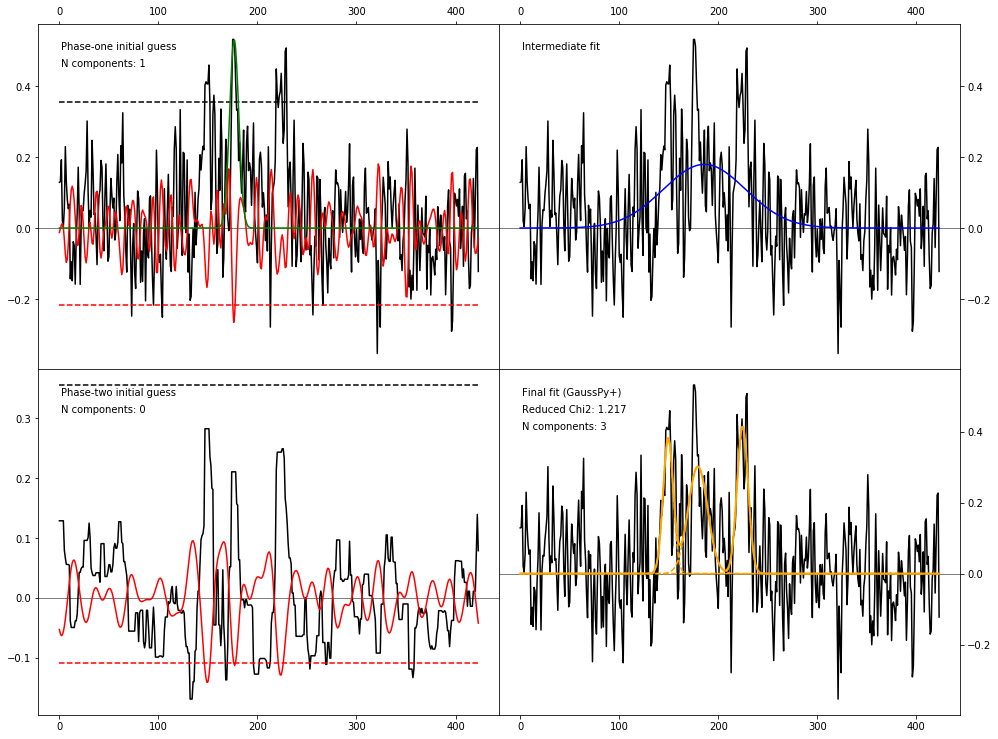

In [7]:
prepare = GaussPyPrepare()
prepare.path_to_file = os.path.join(
    '..', 'gausspyplus', 'data', 'grs-test_field.fits')
prepare.p_limit = 0.02
prepare.pad_channels = 5
prepare.signal_mask = True
prepare.min_channels = 100
prepare.mask_out_ranges = []
prepare.snr = 3.
prepare.significance = 5.
prepare.snr_noise_spike = 5.
data_location = (42, 40)  # given in (ypix, xpix)
prepared_spectrum = prepare.return_single_prepared_spectrum(data_location)

decompose = GaussPyDecompose()
decompose.two_phase_decomposition = True
decompose.alpha1 = 2.58
decompose.alpha2 = 5.14
decompose.improve_fitting = True
decompose.exclude_means_outside_channel_range = True
decompose.min_fwhm = 1.
decompose.max_fwhm = None
decompose.snr = 3.
decompose.snr_fit = None
decompose.significance = 5.
decompose.snr_negative = None
decompose.rchi2_limit = 1.2
decompose.max_amp_factor = 1.1
decompose.refit_residual = True
decompose.refit_broad = True
decompose.refit_blended = True
decompose.separation_factor = 0.8493218
decompose.fwhm_factor = 2.
decompose.single_prepared_spectrum = prepared_spectrum
decomposed_test = decompose.decompose()
                             

In [8]:
decomposed_test

{'N_blended': [0],
 'N_components': [3],
 'N_negative_residuals': [0],
 'amplitudes_fit': [[0.415385017020267,
   0.3807162967118227,
   0.30208444765798687]],
 'amplitudes_fit_err': [[0.04727087008310872,
   0.04946285472856925,
   0.036173710191960924]],
 'amplitudes_initial': [array([0.53188264])],
 'best_fit_aicc': [-502.14512895692417],
 'best_fit_rchi2': [1.2173983691966355],
 'fwhms_fit': [[13.11295570578094, 11.986073989353983, 23.14199716851573]],
 'fwhms_fit_err': [[1.723627737049996, 1.899704254993625, 3.4252590058930465]],
 'fwhms_initial': [array([10.86102581])],
 'index_fit': [0],
 'index_initial': [[0]],
 'log_gplus': [[1, 3]],
 'means_fit': [[224.58669804433455, 149.40833220031922, 179.39078301749902]],
 'means_fit_err': [[0.7317817077431703,
   0.7943270083413927,
   1.3727648425273273]],
 'means_initial': [array([176.5])]}